# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [112]:
import tensorflow as tf

## Get the dataset

In [113]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [114]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [115]:
# Pre processing 

print(X_train.shape,Y_train.shape )

(8000, 28, 28) (8000,)


## Visualize the dataset
Print some images with labels.

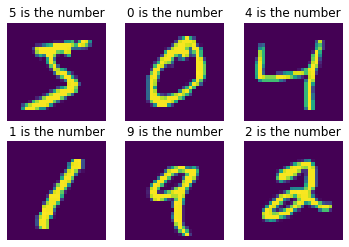

In [116]:
import matplotlib.pyplot as plt

# Your code
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i])
  plt.title("{} is the number".format(y_train[i]))
  plt.axis('off')

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [117]:
import numpy as np

# Your code
unique, counts = np.unique(Y_train, return_counts=True)

print( np.array((unique, counts)).T)

[[  0 781]
 [  1 892]
 [  2 832]
 [  3 807]
 [  4 808]
 [  5 717]
 [  6 757]
 [  7 833]
 [  8 769]
 [  9 804]]


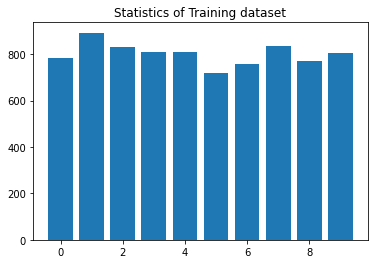

In [118]:
#for training dataset
plt.bar(unique,counts)
plt.title("Statistics of Training dataset")
plt.show()

<function matplotlib.pyplot.show>

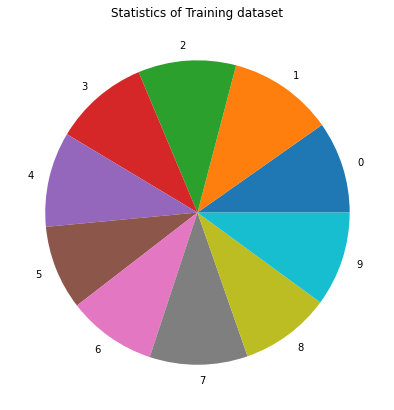

In [119]:
#for training data set
fig = plt.figure(figsize=(10,7))
plt.title("Statistics of Training dataset")
plt.pie(counts, labels=unique)
plt.show


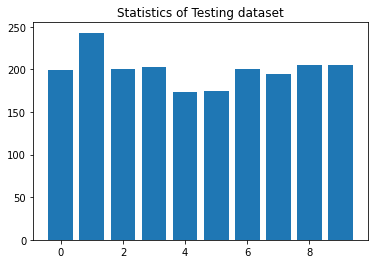

In [120]:
#for testing dataset
unique, counts = np.unique(Y_test, return_counts=True)
plt.bar(unique,counts)
plt.title("Statistics of Testing dataset")
plt.show()

<function matplotlib.pyplot.show>

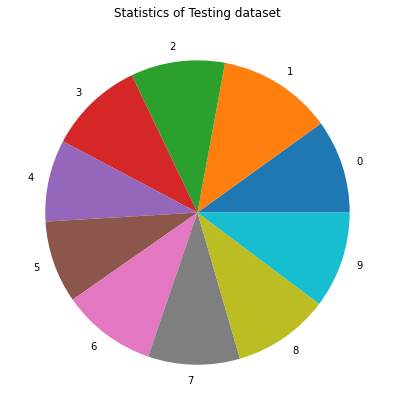

In [121]:
#for testing data set
unique, counts = np.unique(Y_test, return_counts=True)
fig = plt.figure(figsize=(10,7))
plt.title("Statistics of Testing dataset")
plt.pie(counts, labels=unique)
plt.show

## Model

In [122]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
model = models.Sequential()
model.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation=tf.nn.softmax))

In [123]:
# Compile the model (add optimizers and metrics)

# Fit the model on the training data (specify validation_split, read about validation if new to you)

model.compile(optimizer='adam',
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=15,validation_split=0.2)


Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3113 - accuracy: 0.9072 - val_loss: 0.1241 - val_accuracy: 0.9635
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.9684 - val_loss: 0.1048 - val_accuracy: 0.9703
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0806 - accuracy: 0.9755 - val_loss: 0.0827 - val_accuracy: 0.9775
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0686 - accuracy: 0.9798 - val_loss: 0.0788 - val_accuracy: 0.9786
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0592 - accuracy: 0.9832 - val_loss: 0.0787 - val_accuracy: 0.9774
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0550 - accuracy: 0.9851 - val_loss: 0.0915 - val_accuracy: 0.9750
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0498 - accuracy: 0.9861 - val_loss: 0.0855 - val_accuracy:

In [124]:
import pandas as pd
df=pd.DataFrame(history.history)
df['epoch']=history.epoch
df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.311257,0.907229,0.124066,0.963500,0
1,0.108003,0.968375,0.104792,0.970333,1
2,0.080621,0.975521,0.082724,0.977500,2
3,0.068574,0.979813,0.078846,0.978583,3
4,0.059209,0.983167,0.078720,0.977417,4
5,0.054951,0.985125,0.091521,0.975000,5
6,0.049822,0.986063,0.085450,0.979417,6
7,0.044085,0.987458,0.076859,0.981917,7
8,0.045210,0.987583,0.085030,0.979750,8
9,0.041517,0.988563,0.078452,0.979917,9


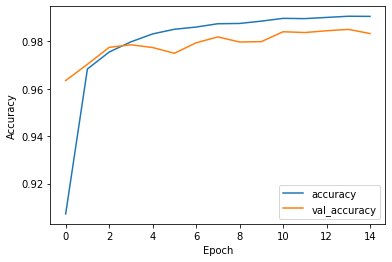

In [125]:
plt.plot(df['epoch'],df['accuracy'],label='accuracy')
plt.plot(df['epoch'],df['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

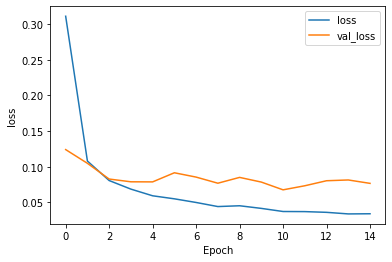

In [126]:
plt.plot(df['epoch'],df['loss'],label='loss')
plt.plot(df['epoch'],df['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

## Predict some images
Print the image along with its label (true value) and predicted value.

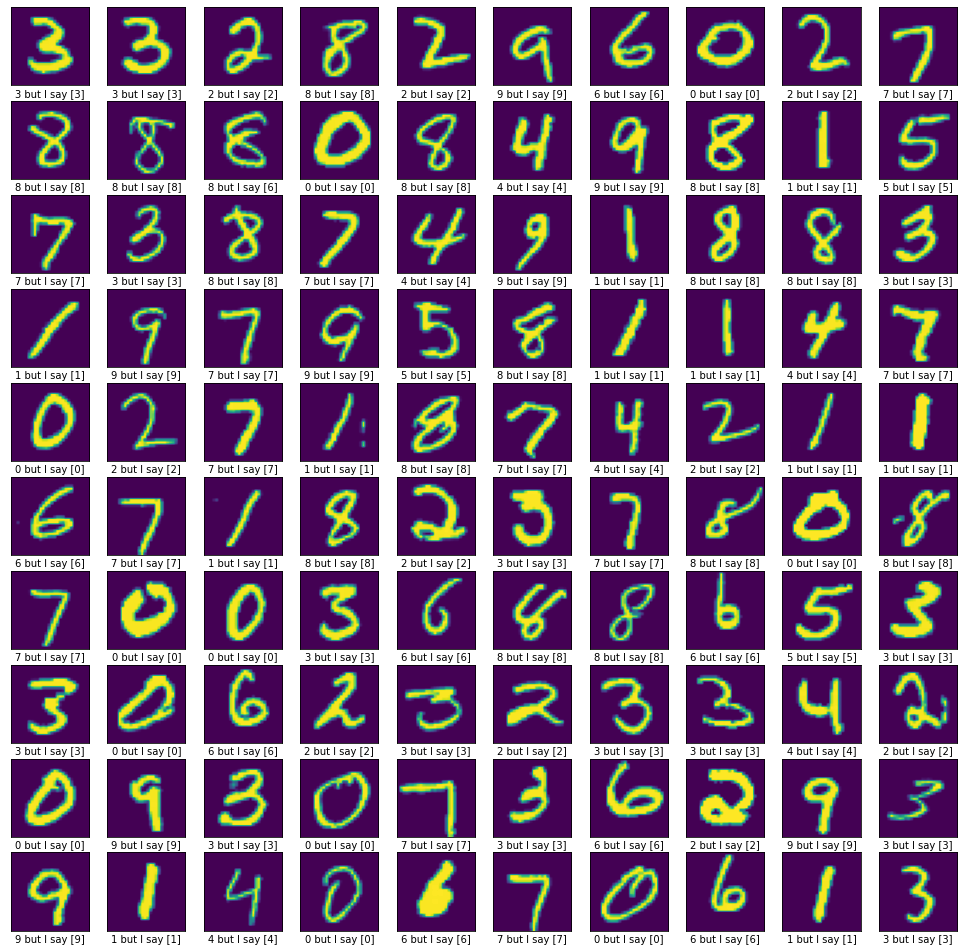

In [129]:
# Your code
digt=model.predict(X_test[:100])
arr=[]
for i in range(100):
  n=np.where(digt[i]==max(digt[i]))
  arr.append(n)
plt.figure(figsize=(17,17))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(f"{Y_test[i]} but I say {arr[i][0]}")
    plt.xticks([])
    plt.yticks([])